# Introducción al Análisis Exploratorio de Datos con Pandas: Operaciones Avanzadas

El objetivo de este notebook es introducir algunas operaciones avanzadas que podemos realizar sobre DFs. Estas operaciones permitiran convertir completamente el formato del DF en cuestion facilitando distintos analisis que podemos realizar sobre los datos asi como visualizaciones.


## Temario

- Descripcion del set de datos y analisis general de sus caractericas: Kickstarter Projects.
- Analizando propiedades especificas del set de datos
- Analizando utilizacion de memoria del dataframe
- Conversion de Datos y mejoras en uso de memoria
- Manipulando el Data Frame: Reestructurando Datos
    - Stack / Unstack
    - Pivot Table


In [204]:
#Importamos las librerias como siempre...(matplotlib y seaborn son las librerìas de visualizaciòn):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## Descripcion del set de datos y analisis general de sus caractericas: Kickstarter Projects

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/kemical/kickstarter-projects/data](https://www.kaggle.com/kemical/kickstarter-projects/data)

Este DS posee informacion de unos 300000 proyectos de Kickstarter, la popular plataforma de Crowdsourcing. Utilizaremos este DS para poder explicar algunos conceptos de reestructuracion de datos que nos seran utiles para nuestros analisis y visualizaciones.

En particular el DS tiene dos archivos, uno con informacion parcial recopilada anteriormente y uno con informacion HASTA inicios del 2018 (con el que estaremos trabajando --> ks-projects-201801.csv).

**Nota Bene:** para aquellos que quieran realizar analisis de los datos anteriores tener en cuenta que el formato de encoding se encuentra en 'Western(windows 1252)' por lo que al realizar la carga con read_csv hay que indicar el encoding como ```encoding='cp1252'```

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o BDs, etc.). En este caso vamos a cargar la info desde un CSV que descargamos previamente de kaggle. Esto lo hacemos con pandas con ```read_csv```. 

In [205]:
#Acà antes tenìa lineas donde puso lo de autenticaciòn con google colab y luego
#al parecer cargò el csv ahi... NO hice esto ya que no voy a usar colab ahora.

# %timeit sirve para evaluar el tiempo de ejecucion
projects_2017 = pd.read_csv('data/ks-projects-201801.csv')
projects_2017.tail()  #Visualizamos parte del DF para tener una idea del mismo.

#Este DS tiene info de proyectos...
#POr ejemplo en la fila 1 vemos que es un proyecto de categorìa 'Documentary' (un documental) y que el objetivo (columna 'Goal' es de 50 millones... es la plata que necesitamos juntar para poder hacer ese proyecto).
#Despues 'launched' es la fecha de lanzamiento, 'pledged' es lo que realmente se consiguiò para el proyecto, un 'state' que es un estado que viene de la plataforma, 'backers' que es la cantidad de personas que tratan de soportar el proyecto.

#Esto es un primer acercamiento para ver los datos de nuestro DF. 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,"50,000.00",2014-09-17 02:35:30,25.00,canceled,1,US,25.00,25.00,"50,000.00"
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,"1,500.00",2011-06-22 03:35:14,155.00,failed,5,US,155.00,155.00,"1,500.00"
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,"15,000.00",2010-07-01 19:40:30,20.00,failed,1,US,20.00,20.00,"15,000.00"
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,"15,000.00",2016-01-13 18:13:53,200.00,failed,6,US,200.00,200.00,"15,000.00"
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,"2,000.00",2011-07-19 09:07:47,524.00,failed,17,US,524.00,524.00,"2,000.00"


In [206]:
print(projects_2017.shape) # shape nos da las dimensiones del data frame (rows x columns)

(378661, 15)


In [207]:
#Size nos "dimensiona" nuestro DF o nuestra serie...:
    # Si es una serie devuelve el numero de rows.
    # Si es un DF (como en nuestro caso) devuelve el numero de rows x el numero de columns 
projects_2017.size

5679915

In [208]:
# Count para contar la cantidad de elementos elementos no nulos en el DF... y para cada atributo nos dice cuantas hay
projects_2017.count()

#Y abajo notamos que tenemos un problema.... hay valores nulos para el atributo 'usd_pledged'.. (374864), ya que el nùmero de filas como vimos arriba de nuestro DF era de 378661.
#Entonces seguramente tengamos en el futuro algùn problema con esta columna.

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [209]:
type(projects_2017["usd pledged"].count()) #Esta columna es de tipo numpy. 

numpy.int64

### Analizando propiedades especificas del set de datos

Ahora vamos a analizar propiedades potenciales que nuestro DS podrìa llegar a tener. 
Para poder comenzar a orientar nuestro analisis podemos por ejemplo querer comenzar a analizar algunas variables que nos interesan para aplicar en nuestros analisis.
Podemos por ejemplo comenzar viendo las **categorias disponibles principales** (columna main_category). 

In [210]:
main_categories = projects_2017['main_category']

In [211]:
type(main_categories) #Vemos que es una serie.

pandas.core.series.Series

In [212]:
# Ahora con value_Counts obtenemos la cantidad de valores que hay para cada una de las main_categories 
# contando los proyectos por categoria principal:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Tambien podemos interesarnos en ver los posibles valores que podemos tener de **estados de un proyecto**

In [213]:
#Nuevamente tomamos nuestro DF y proyectamos 'state':
states = projects_2017['state']
#Le hacemos el value_counts y vemos los estados (el estado undefined es cuando tenemos un problema con los datos)
#POdemos suponer que 'failed' son proyectos que fallaron porque no consiguieron la cantidad de $ que necesitaban y 
#'successful' son los proyectos que  si consiguieron el $, 'canceled' proyectos cancelados por alguna razòn por la persona que lo creò,
#'live' serìan proyectos que todavìa se encuentran buscando $ para financiarlos; y 'suspended' proyectos suspendidos... habrìa que ver la diferencia de este con 'canceled'.
states.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

Las dos variables potenciales que vimos las podemos considerar como variables categoricas; las cuales podremos usar para nuestro analisis utilizàndolas por ej. para agrupar o dividir informacion y verla por separada para analizar su comportamiento, o tambien para filtrar informacion.


Otra columna interesante con la que podriamos trabajar es **launched**, que pensamos que es la fecha en la cual se lanzò el proyecto. Vamos a entender su uso en el data set...

In [214]:
#Proyectamos la variable launched y tomamos un head para ver el formato en el que tiene la fecha...
#Vemos que es un 'datetime'... entonces podrìamos utilizar algunas de las funciones de Pandas para trabajar con este tipo de datos y 
#asì enves de tratarlo como objeto (ver abajo que dice dtype: object) podremos crear una nueva columna y asì usar funciones para manejar fechas. 
projects_2017['launched'].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [215]:
#Acà abajo es donde generamos una nueva columna 'launched_datetime' y le seteamos el tipo datetime:
projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])

#Y ahora utilizamos la funciòn '.year' provista por datetime (.dt).. 
#de esta manera generamos una nueva columna obteniendo el año, esto los usuaremos en visualizacion.
projects_2017['year'] = projects_2017['launched_datetime'].dt.year  #Esto nos devuelve un INT.

In [216]:
projects_2017.info()
#Vemos que tenemos 2 nuevas columnas (launched_datetime de tipo 'datetime64' y year de tipo 'int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  object        
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [217]:
#Ahora, podemos ver que ya habiendo extraido el año vamos a ver la info de que años tenemos disponible:
projects_2017['year'].value_counts()

#Vemos que tenemos datos hasta el 2018 (pero son datos parciales... por eso tan pocos registros, 124).
#Vemos que a medida que subimos en los años tenemos màs proyectos (empezamos con 2009 en la fecha de inicio de la pàgina QUickStarter con 7 proyectos llegando al 2015 con 77300).
#Los del año 1970 son seguro errores, seguramente ahì las fechas eran 000000 (Cargadas como 'test' y al transformar la fecha me arojò la de 1970... estos 7 registros los tomamos como ERRORES)

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

Con la variable anterior podrìamos utilizarla para desarrollar analisis de series de tiempo.

Haciendo un analisis de algunas de las otras variables podemos tambien llegar a la conclusion de lo que representan las siguientes variables:
- **Goal**: Objetivo/cantidad de dinero a obtener de recaudacion para un proyecto
- **Pledged**: Cantidad de dinero recaudada para un proyecto
- **Backers**: Cantidad de personas que invirtieron en el proyecto.

### Analizando utilizacion de memoria del dataframe

Es recomendable realizar un analisis de utilizacion de memoria del DF para poder realizar mejoras en el uso de recursos.

In [218]:
# Vemos los dtypes que estamos utilizando en el DF, para luego por ej. poder decidir setear algunos especificamente en carga:
projects_2017.dtypes

ID                            int64
name                         object
category                     object
main_category                object
currency                     object
deadline                     object
goal                        float64
launched                     object
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
launched_datetime    datetime64[ns]
year                          int64
dtype: object

In [219]:
#Vemos que tenemos una gran cantidad de datatype 'object'.
#COn los 'object' vamos a tener un mayor uso de memoria por su definiciòn... y por esto està bueno revisar el tipo correcto que deberìan tener 
#(para solucionar trabajar con DFs muy grandes o para evitar limitaciones de memoria y queremos ser màs eficiente).
#Esto es algo a considerar mayormente en el proceso de CARGA del df. 

#AHora con info() podemos ver la informacion general del DF (ademàs de los Dtype, cantidad de rows y si tiene o no campos nulos, 
#podemos ver el dato 'memory usage' que nos indica la cantidad de memoria que utiliza en ese momento para procesar el DF).
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  object        
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [220]:
#Tambien podemos pedirle al DF la cantidad de utilizaciòn de memoria:
#projects_2017.memory_usage(deep=False)

#Y aca lo pasamos a MBs:
(projects_2017.memory_usage(deep=False) / (1024 * 1024)).sum()

# De esta manera nos indica el uso en bytes de cada columna en bytes.
# Esto es de gran utilidad cuando tenemos ciertos problemas al realizar ciertas operaciones con los DFs o cuadno estamos teniendo problemas de memoria.
# La opcion 'deep' no permite analizar en profundidad el uso que se esta haciendo de memoria a nivel sistema.

49.112342834472656

Ahora considerando cuanta memoria estamos utilizando vamos a ver cómo hacer para utilizar menor cantidad de memoria. 

Al contar con informacion sobre las columnas del dataframe o analizandolas podemos hacer mejoras en el uso de los tipos del dataframe de tal forma de optimizar el uso de memoria. Los dtypes usados por pandas son esencialmente los dtypes de NumPy.

Por ej. si sabemos que un nùmero representado por int64 puede ser utilizado en un int32 perfecto, habrìa que transformarlo a ese tipo de dato.

### Conversion de Datos y mejoras en uso de memoria

In [221]:
#Vimos que hay tipos de datos que los podemos representar como de tipo categòrico... 
#y esta conversiòn nos podrìa reducir mucho la utilizacion de memoria.

#Por ejemplo vamos a castear especificamente una serie a un tipo categorico ('main_categories' que es un object) 
#y luego verificar su dtype

#Primero vemos las categorìas principales:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [222]:
#Entones lo que vamos a hacer con astype es... tomando estas categorìas principales 
# (main_categories) la tratamos como un tipo de dato category (no tiene nada que ver con la columna 'category' de nuestro DF):
main_categories.astype('category').dtypes
#Y abajo vemos que entonces tenemos el CategoricalDtype y podemos usar directamente esa información, ahorrandonos asì espacio.

CategoricalDtype(categories=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
                  'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
                  'Photography', 'Publishing', 'Technology', 'Theater'],
                 ordered=False)

In [223]:
# AHora vemos el uso de memoria para cada columna de nuestro DF... y vemos que para 'main_category' el uso de memoria
#ahora es muchìsimo menor que los demàs.

#Primero vemos que ahora cambio a tipo de dato 'category':
projects_2017.astype({'main_category':'category'}).dtypes

ID                            int64
name                         object
category                     object
main_category              category
currency                     object
deadline                     object
goal                        float64
launched                     object
pledged                     float64
state                        object
backers                       int64
country                      object
usd pledged                 float64
usd_pledged_real            float64
usd_goal_real               float64
launched_datetime    datetime64[ns]
year                          int64
dtype: object

In [224]:
#Y ahora si, vemos el menor uso de memoria para main_category (379421):
projects_2017.astype({'main_category':'category'}).memory_usage()

Index                    128
ID                   3029288
name                 3029288
category             3029288
main_category         379421
currency             3029288
deadline             3029288
goal                 3029288
launched             3029288
pledged              3029288
state                3029288
backers              3029288
country              3029288
usd pledged          3029288
usd_pledged_real     3029288
usd_goal_real        3029288
launched_datetime    3029288
year                 3029288
dtype: int64

In [225]:
#ALgo a considerar... es que este tipo de operaciòn (astype creeeo que se refiere) nos devuelve una copia.

#Osea que NO se guardò en nuestro DF... vemos que la columna main_category aca sigue siendo object:
projects_2017.info()

#VER ESTO PARA QUE SI SE GUARDE! (ver el parametro 'copy'). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  object        
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [226]:
#Otra forma de hacer esto es indicando al momento de lectura de la fuente de datos los tipos... 
#y entonces acà ponemos que main_category, category y country son de tipo category:
projects = pd.read_csv('data/ks-projects-201801.csv', \
                            dtype={'main_category':'category','category':'category',\
                                   'country':'category'})

In [227]:
#Y ahora si en nuestro DF vemos que se modificaron los dtype para estas 3 columnas:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   ID                378661 non-null  int64   
 1   name              378657 non-null  object  
 2   category          378661 non-null  category
 3   main_category     378661 non-null  category
 4   currency          378661 non-null  object  
 5   deadline          378661 non-null  object  
 6   goal              378661 non-null  float64 
 7   launched          378661 non-null  object  
 8   pledged           378661 non-null  float64 
 9   state             378661 non-null  object  
 10  backers           378661 non-null  int64   
 11  country           378661 non-null  category
 12  usd pledged       374864 non-null  float64 
 13  usd_pledged_real  378661 non-null  float64 
 14  usd_goal_real     378661 non-null  float64 
dtypes: category(3), float64(5), int64(2), object(5)
mem

In [228]:
#Y ahora vemos que el uso de memoria es menor para esos 3:
projects.memory_usage()

Index                   128
ID                  3029288
name                3029288
category             763714
main_category        379421
currency            3029288
deadline            3029288
goal                3029288
launched            3029288
pledged             3029288
state               3029288
backers             3029288
country              379485
usd pledged         3029288
usd_pledged_real    3029288
usd_goal_real       3029288
dtype: int64

In [229]:
#Vemos que bajamos màs de 10 MB en comparaciòn al anterior càlculo, BIEN:
(projects.memory_usage(deep=False) / (1024 * 1024)).sum()

36.11965560913086

In [230]:
#Asì solo devolvemos las columnas de tipo numerico de nuestro DF:
projects.select_dtypes('number')

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,"1,000.00",0.00,0,0.00,0.00,"1,533.95"
1,1000003930,"30,000.00","2,421.00",15,100.00,"2,421.00","30,000.00"
2,1000004038,"45,000.00",220.00,3,220.00,220.00,"45,000.00"
3,1000007540,"5,000.00",1.00,1,1.00,1.00,"5,000.00"
4,1000011046,"19,500.00","1,283.00",14,"1,283.00","1,283.00","19,500.00"
...,...,...,...,...,...,...,...
378656,999976400,"50,000.00",25.00,1,25.00,25.00,"50,000.00"
378657,999977640,"1,500.00",155.00,5,155.00,155.00,"1,500.00"
378658,999986353,"15,000.00",20.00,1,20.00,20.00,"15,000.00"
378659,999987933,"15,000.00",200.00,6,200.00,200.00,"15,000.00"


In [231]:
#Asì solo devolvemos las columnas de tipo categorico que inicializamos en el dataframe
projects.select_dtypes('category')

,category,main_category,country
0,Poetry,Publishing,GB
1,Narrative Film,Film & Video,US
2,Narrative Film,Film & Video,US
3,Music,Music,US
4,Film & Video,Film & Video,US
...,...,...,...
378656,Documentary,Film & Video,US
378657,Narrative Film,Film & Video,US
378658,Narrative Film,Film & Video,US
378659,Technology,Technology,US


In [232]:
#Hacemos un value count para el main_categories que teniamos antes y el que le cambiamos el dtype y vemos que tienen la misma cantidad de registros:
main_categories = projects_2017['main_category']
main_categories_new = projects ['main_category']

In [233]:
main_categories.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [234]:
main_categories_new.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [235]:
#Ahora vamos a convertir el pd.Series a Python list
counts = main_categories_new.value_counts().tolist()
print(counts)
print(type(counts))

[63585, 51918, 39874, 35231, 32569, 30070, 28153, 24602, 22816, 10913, 10819, 10779, 8809, 4755, 3768]
<class 'list'>


In [236]:
main_categories_new.value_counts().index

CategoricalIndex(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology',
                  'Design', 'Art', 'Food', 'Fashion', 'Theater', 'Comics',
                  'Photography', 'Crafts', 'Journalism', 'Dance'],
                 categories=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', ...], ordered=False, dtype='category')

In [237]:
#Ahora vamos a convertir pd.Series a pd.DataFrame:
main_categories_new.to_frame()

,main_category
0,Publishing
1,Film & Video
2,Film & Video
3,Music
4,Film & Video
...,...
378656,Film & Video
378657,Film & Video
378658,Film & Video
378659,Technology


## Reestructurando Datos

Para poder trabajar con nuestro set de datos es importante darle importancia a como se encuentran estructurados/presentados para poder facilitar nuestro análisis. Para esto tenemos 3 principios basicos de gran importancia:

- Cada variable conforma una columna
- Cada observacion representa una fila
- Cada tipo de conjunto/unidad de observaciones conforma una tabla

Para facilitar esto estaremos usando algunas funciones como:

- stack
- unstack
- pivot_table


### Stack y Unstack

Esta funcion fue nombrada por una analogia con una coleccion de libros que es reorganizada estando lado a lado en posicion horizontal (las columnas de un data frame) a estar apilados verticalmente uno encima del otro (en el indice del DataFrame).

POr ej. en una biblioteca tenemos libros que estàn organizados lado a lado en posiciòn horizonal (esto lo pensarìamos como si fueran las columnas de nuestro DF -todos los indices x columna de nuestro DF-):
 
![title](data/Horizontal.png)

Y al hacer una operaciòn de STACK nosotros estariamos rotando esos libros teniendolos asì:

![title](data/Vertical.png)

→ Y asì estaràn apilados verticalmente uno encima del otro (al ser vertical lo podrìamos pensar como lo que serìa el ìndice del DF en las filas). 

Partiendo de esta idea podemos asumir que tenemos un DF con MultiIndices en sus filas y en sus columnas (en la imagen de abajo los multiindices de columnas serìan c00, c01 y c10; y de las filas serìa r00 y r01). Si realizamos una operaciòn de Stacking (STACK) al DF lo que vamos a hacer es mover el indice por columna mas interno del DF (en el caso de abajo tenemos el ìndice c0 y c1 pero los màs internos son c00, c01 y c10) para que el mismo se convierta en el indice por fila mas interno del DF resultante (algo asi como rotar y pivotear) --> y los c0 y c1 que vemos al generar

De esta manera vemos en la flecha de "d.stack()" que lo que tenìa como columnas pasan a filas y lo que teniamos como filas a columnas.  Y obviamente si aplicamos a este DF resultante 'unstack' obtenemos el DF original. 

La operacion inversa se llama unstacking. Esto significa mover el indice por fila mas interno del DF (en nuestro caso son r00 y r01) para que se convierta en el indice por columna mas interno del DF resultante. Para esto vemos el DF resultante en la imagen luego de aplicar "d.unstack()".

En la siguiente representacion grafica se puede entender mas claramente:

![title](data/Stack_Unstack.png)

Podemos entonces trabajar con los siguientes ejemplos

In [238]:
#Agrupamos nuestro DF de proyectos por 'main_category' obteniendo algunas caracterìsticas:
projects_by_main_category = projects_2017.groupby('main_category')\
    .agg({'backers':['mean','sum'],'pledged':'mean',\
          'goal':'mean', 'category': 'count'}) 
    #Las agregaciones las hacemos con lo que vimos de split-obtain-combine.
    
#De esta manera por ej. sacamos el promedio y la suma de los backers que va a tener cada categoria, el promedio de los pledged y de goal (cantidad de $ que se junto y que se estipulò como objetivo) para cada main_category;
#y tambien contamos la cantidad de items que hay dentro de esa categorìa ('category'). 

In [239]:
projects_by_main_category.head(10)

#POr la forma en que trabaja Groupby vemos que tenemos multiindices para las columnas. 

backers                        pledged  \
                              mean       sum                 mean   
main_category                                                       
Art                          42.21   1188200             3,606.97   
Comics                      134.77   1458090             6,899.31   
Crafts                       27.28    240342             2,016.15   
Dance                        42.80    161275             3,690.80   
Design                      241.30   7255880            27,119.75   
Fashion                      61.45   1401993             6,549.03   
Film & Video                 66.02   4197577             6,362.73   
Food                         54.17   1332751             5,340.16   
Games                       321.79  11336829            21,865.17   
Journalism                   38.29    182091             3,218.09   

                              goal category  
                              mean    count  
main_category                                
Art                      40,829.18    28153  
Comics                   20,243.65    10819  
Crafts                   11,592.29     8809  
Dance                    10,321.33     3768  
Design                   46,733.63    30070  
Fashion                  24,818.25    22816  
Film & Video             84,334.01    63585  
Food                     48,693.75    24602  
Games                    50,711.30    35231  
Journalism               88,783.58     4755

In [240]:
#Vemos que nos devuelve la operaciòn de stack... movemos el ìndice interno de las columnas 
#a las filas. Y asì vemos con los nan son las estadìsticas que NO estamos calculando entonces ahi no tenemos valores (Nan).

projects_by_main_category.stack()

backers              pledged  \
main_category                                                   
Art           count                  nan                  nan   
              mean                 42.21             3,606.97   
              sum           1,188,200.00                  nan   
Comics        count                  nan                  nan   
              mean                134.77             6,899.31   
              sum           1,458,090.00                  nan   
Crafts        count                  nan                  nan   
              mean                 27.28             2,016.15   
              sum             240,342.00                  nan   
Dance         count                  nan                  nan   
              mean                 42.80             3,690.80   
              sum             161,275.00                  nan   
Design        count                  nan                  nan   
              mean                241.30            27,119.75   
              sum           7,255,880.00                  nan   
Fashion       count                  nan                  nan   
              mean                 61.45             6,549.03   
              sum           1,401,993.00                  nan   
Film & Video  count                  nan                  nan   
              mean                 66.02             6,362.73   
              sum           4,197,577.00                  nan   
Food          count                  nan                  nan   
              mean                 54.17             5,340.16   
              sum           1,332,751.00                  nan   
Games         count                  nan                  nan   
              mean                321.79            21,865.17   
              sum          11,336,829.00                  nan   
Journalism    count                  nan                  nan   
              mean                 38.29             3,218.09   
              sum             182,091.00                  nan   
Music         count                  nan                  nan   
              mean                 52.17             3,992.74   
              sum           2,708,475.00                  nan   
Photography   count                  nan                  nan   
              mean                 39.71             3,664.65   
              sum             428,078.00                  nan   
Publishing    count                  nan                  nan   
              mean                 55.97             3,638.72   
              sum           2,231,589.00                  nan   
Technology    count                  nan                  nan   
              mean                164.47            22,586.16   
              sum           5,356,513.00                  nan   
Theater       count                  nan                  nan   
              mean                 47.06             4,097.22   
              sum             513,536.00                  nan   

                                    goal             category  
main_category                                                  
Art           count                  nan            28,153.00  
              mean             40,829.18                  nan  
              sum                    nan                  nan  
Comics        count                  nan            10,819.00  
              mean             20,243.65                  nan  
              sum                    nan                  nan  
Crafts        count                  nan             8,809.00  
              mean             11,592.29                  nan  
              sum                    nan                  nan  
Dance         count                  nan             3,768.00  
              mean             10,321.33                  nan  
              sum                    nan                  nan  
Design        count                  nan            30,070.00  
              mea

In [241]:
#Igualmente lo de arriba no tiene mucho uso en nuestro caso; vamos a renombramos las columnas eliminando el multi indice:
projects_by_main_category.columns = ['backers_mean', 'backers_total', 'pledged_mean', 'goal_mean', 'projects_total']
projects_by_main_category

#De esta manera tenemos un ùnico indice. 

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,1188200,"3,606.97","40,829.18",28153
Comics,134.77,1458090,"6,899.31","20,243.65",10819
Crafts,27.28,240342,"2,016.15","11,592.29",8809
Dance,42.80,161275,"3,690.80","10,321.33",3768
Design,241.30,7255880,"27,119.75","46,733.63",30070
Fashion,61.45,1401993,"6,549.03","24,818.25",22816
Film & Video,66.02,4197577,"6,362.73","84,334.01",63585
Food,54.17,1332751,"5,340.16","48,693.75",24602
Games,321.79,11336829,"21,865.17","50,711.30",35231


In [242]:
# Si realizamosuna operaciòn de STACK tenemos como resultado una serie... lo interesante
#es que la serie tiene un multiìndice... tiene un ìndice por main_category ('Art', 'Theater', etc.) y despues
#tenemos los distintos levels que nosotros le pasamos anteriormente (backers_mean,backers_total, (....),projects_total))

stacked = projects_by_main_category.stack()
stacked

#Entonces tenemos una SERIE con un multiindice a nivel de FILA ahora.

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
                                        ...         
Theater        backers_mean                    47.06
               backers_total              513,536.00
               pledged_mean                 4,097.22
               goal_mean                   27,542.35
               projects_total              10,913.00
Length: 75, dtype: float64

In [243]:
#Hacemos la operaciòn contraria y vemos que obtenemos el DF que anteriormente habìamos creado:
stacked.unstack()

,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","3,606.97","40,829.18","28,153.00"
Comics,134.77,"1,458,090.00","6,899.31","20,243.65","10,819.00"
Crafts,27.28,"240,342.00","2,016.15","11,592.29","8,809.00"
Dance,42.80,"161,275.00","3,690.80","10,321.33","3,768.00"
Design,241.30,"7,255,880.00","27,119.75","46,733.63","30,070.00"
Fashion,61.45,"1,401,993.00","6,549.03","24,818.25","22,816.00"
Film & Video,66.02,"4,197,577.00","6,362.73","84,334.01","63,585.00"
Food,54.17,"1,332,751.00","5,340.16","48,693.75","24,602.00"
Games,321.79,"11,336,829.00","21,865.17","50,711.30","35,231.00"


In [244]:
#AHora volvemos a hacer un STACK de projects_by_main_category:
#y se lo asignamos a la variable 'projects_by_main_category_reshaped':
projects_by_main_category_reshaped = projects_by_main_category.stack()

In [245]:
# Vemos que nos queda el multi indice en las filas que ya vimos:
projects_by_main_category_reshaped

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
                                        ...         
Theater        backers_mean                    47.06
               backers_total              513,536.00
               pledged_mean                 4,097.22
               goal_mean                   27,542.35
               projects_total              10,913.00
Length: 75, dtype: float64

In [246]:
#Si hacemos un reset index en este caso... como nos quedò un multiìndice por filas que tuvimos, vemos que nos devuelve un DF:
projects_by_main_category_reshaped = projects_by_main_category_reshaped.reset_index()
#Ya que reseteamos por ìndice... entonces tenemos el valor de main_category y los distintos niveles que nos indicaba antes (en 'level_1' y '0')... comparando lo de arriba con lo que nos devuelve abajo es mejor para entender que hizo. 

In [247]:
projects_by_main_category_reshaped.head(10)   #El DF que nos devuelve al resetear el indice.

,main_category,level_1,0
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


In [248]:
#AHora vamos a renombrar las columnas para que sea màs entendible:
projects_by_main_category_reshaped.columns = ['main_category','statistics','values']

In [249]:
projects_by_main_category_reshaped.head(10)
#Esto es mucho mejor... tenemos algo que observar ('main_category' en nuestor caso) al cual le aplicamos una estadìstica ('stadistics') y su valor especìfico de dicha estadìstica ('values')

#De esta manera partimos de un DF que tenia para cada estadìstica un valor calculado a este DF teniendo por fila el tipo de estadìstica y su valor especìfico para una categorìa en nuestro caso.

#Esto es muy ùtil para despuès realizar distintos algoritmos sobre el DF.

,main_category,statistics,values
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
5,Comics,backers_mean,134.77
6,Comics,backers_total,"1,458,090.00"
7,Comics,pledged_mean,"6,899.31"
8,Comics,goal_mean,"20,243.65"
9,Comics,projects_total,"10,819.00"


## Unstack

Nos permite deshacer la accion de stack.

In [250]:
#AHora vemos un pequeño ejemplo para UNSTACK...
#Unstack lo que hace es deshacer una operaciòn de STACK... va a tomar el ìndice por fila màs interno del multiìndice y lo va a llevar a la columna.

#COn el DF que teniamos y aplicandole STACK....:
projects_by_main_category_stacked = projects_by_main_category.stack()

In [251]:
projects_by_main_category_stacked.head(10)

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
Comics         backers_mean                   134.77
               backers_total            1,458,090.00
               pledged_mean                 6,899.31
               goal_mean                   20,243.65
               projects_total              10,819.00
dtype: float64

In [252]:
#Vemos que con stack nos estaba quedando una SERIE con multiìndice con 'main_category' y el nombre de la estadìstica.

#Y ahora si aplicamos unstack volvemos a tener el DF que teniamos originalmente con la categorìa principal y sus estadìsticas que calculamos originalmente.
projects_by_main_category_stacked.unstack() 

#Algo a tener en cuenta es que unstack toma por defaul el valor de nivel -1 del indice (por esto toma el ìndice màs interno que tiene como multiìndice), es decir los labels backers_mean, backers_total que son devueltos como columnas


,backers_mean,backers_total,pledged_mean,goal_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","3,606.97","40,829.18","28,153.00"
Comics,134.77,"1,458,090.00","6,899.31","20,243.65","10,819.00"
Crafts,27.28,"240,342.00","2,016.15","11,592.29","8,809.00"
Dance,42.80,"161,275.00","3,690.80","10,321.33","3,768.00"
Design,241.30,"7,255,880.00","27,119.75","46,733.63","30,070.00"
Fashion,61.45,"1,401,993.00","6,549.03","24,818.25","22,816.00"
Film & Video,66.02,"4,197,577.00","6,362.73","84,334.01","63,585.00"
Food,54.17,"1,332,751.00","5,340.16","48,693.75","24,602.00"
Games,321.79,"11,336,829.00","21,865.17","50,711.30","35,231.00"


In [253]:
#AHora vamos a indicar que tome el nivel 0 del ìndice... primero nuevamente graficamos la SERIE que teniamos al aplicar STACK:
projects_by_main_category_stacked

main_category                
Art            backers_mean                    42.21
               backers_total            1,188,200.00
               pledged_mean                 3,606.97
               goal_mean                   40,829.18
               projects_total              28,153.00
                                        ...         
Theater        backers_mean                    47.06
               backers_total              513,536.00
               pledged_mean                 4,097.22
               goal_mean                   27,542.35
               projects_total              10,913.00
Length: 75, dtype: float64

In [254]:
# Y ahora con el 0 unstack toma el nivel 0 del indice, por lo cual quedan las columnas de cada categoria.
projects_by_main_category_stacked.unstack(0)

#Entonces nos queda las columnas de cada una de las categorìas. 
#DE esta manera abajo vemos que obtuvimos por columna cada una de las 'main_category'
#y en las filas tenemos cada uno de los valores de las estadìsticas.

#Esto nos podrìa ser ùtil. 

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,42.21,134.77,27.28,42.80,241.30,61.45,66.02,54.17,321.79,38.29,52.17,39.71,55.97,164.47,47.06
backers_total,"1,188,200.00","1,458,090.00","240,342.00","161,275.00","7,255,880.00","1,401,993.00","4,197,577.00","1,332,751.00","11,336,829.00","182,091.00","2,708,475.00","428,078.00","2,231,589.00","5,356,513.00","513,536.00"
pledged_mean,"3,606.97","6,899.31","2,016.15","3,690.80","27,119.75","6,549.03","6,362.73","5,340.16","21,865.17","3,218.09","3,992.74","3,664.65","3,638.72","22,586.16","4,097.22"
goal_mean,"40,829.18","20,243.65","11,592.29","10,321.33","46,733.63","24,818.25","84,334.01","48,693.75","50,711.30","88,783.58","16,056.36","13,003.23","29,131.46","119,712.32","27,542.35"
projects_total,"28,153.00","10,819.00","8,809.00","3,768.00","30,070.00","22,816.00","63,585.00","24,602.00","35,231.00","4,755.00","51,918.00","10,779.00","39,874.00","32,569.00","10,913.00"


In [255]:
#Hacer la operaciòn anterior es IGUAL a trasponer el DF original con '.T':
projects_by_main_category.T

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
backers_mean,42.21,134.77,27.28,42.80,241.30,61.45,66.02,54.17,321.79,38.29,52.17,39.71,55.97,164.47,47.06
backers_total,"1,188,200.00","1,458,090.00","240,342.00","161,275.00","7,255,880.00","1,401,993.00","4,197,577.00","1,332,751.00","11,336,829.00","182,091.00","2,708,475.00","428,078.00","2,231,589.00","5,356,513.00","513,536.00"
pledged_mean,"3,606.97","6,899.31","2,016.15","3,690.80","27,119.75","6,549.03","6,362.73","5,340.16","21,865.17","3,218.09","3,992.74","3,664.65","3,638.72","22,586.16","4,097.22"
goal_mean,"40,829.18","20,243.65","11,592.29","10,321.33","46,733.63","24,818.25","84,334.01","48,693.75","50,711.30","88,783.58","16,056.36","13,003.23","29,131.46","119,712.32","27,542.35"
projects_total,"28,153.00","10,819.00","8,809.00","3,768.00","30,070.00","22,816.00","63,585.00","24,602.00","35,231.00","4,755.00","51,918.00","10,779.00","39,874.00","32,569.00","10,913.00"


### Pivot & Pivot Table

La funcion de pivot es utilizada para crear una nueva tabla derivada a partir de una tabla original dada. Toma 3 argumentos con los siguientes nombres: index, columns y values. Como valores de cada uno de estos parametros, es necesario especificar el nombre de una columna de la tabla original. Luego la funcion de pivot va a crear una nueva tabla donde:

- Los indices de fila y columna son los valores unicos de los parametros respectivos.
- Los valores de las celdas de las nueva table son tomados de la columna dada en el parametro values

Un problema que podriamos tener utilizando pivot table son los duplicados... para manejar esto lo que hace es lanzar una ValueError en caso de duplicados. Vamos a considerar la funcion pivot_table que resuelve esto con una funcion de agregacion que se puede indicar como se ve en el siguiente ejemplo:

![title](data/Pivot_Table.png)

En este ejemplo vamos a crear una tabla pivot a travès del ìndice 'item' (va a tomar la columna 'item' del DF original)...y  nuestro indice por columna va a tomar los valores de 'CType); y los valores a procesar los va a tomar de la columna 'USD'. 
ENtonces vemos que en la tabla resultado, en las filas, tenemos los valores de Items (Item 0 e Item 1). Y en las columnas va a estar definido por las que tenìa nuestro DF original en 'CType'.. donde tenemos Bronze, GOld y SIlver. 

Y lo que va a estar haciendo al pivotear es tomar los distintos valores que hay para las interesecciones... por ej. si tomamos Item 0 y vemos que para CType Bronze tiene un ùnico valor de USD (2)... ese valor va a ser el que va a estar en la tabla resultado en la interesecciòn/'coordenadas' entre Item0 y Bronze de la tabla resultado (osea el 2 que vemos ahì). 

Para el caso de Gold vemos que tenemos 2 valores para el Item 0 (en la 1er tabla): 1 y 3. ENtonces ahì en la tabla resultante en Item0,Gold 
SI estuvieramos utilizando la tabla de pivote que NO admite duplicados ahi tendrìamos problemas con esto.. ya que NO sabrìa que poner (tenemos un 1 y un 3), lo que emitirà un ValueError indicando que la operaciòn no se puede hacer. Pero con pivot_table podemos definir una funciòn de agregaciòn que nos permite trabajar en caso que tenemos duplicados por fila y columna como nos sucediò con el 1 y 3.... entonces le indicamos la funciòn de agregaciòn 'np.mean' para que haga el promedio entre 1 y 3... y nos dà 2 (ver intersecciòn Item0 y GOld de la tabla resultante). 

Y para el caso de silver como de Item 0 no tenemos nada de info para 'pivotear' nos pone Nan en la tabla resultado.

El mismo analisis para los de Item1.

Resumen: utilizamos esto para poder crear una nueva tabla a partir de una tabla original, y a partir de estos valores podemos espcificar cuales son los que vamos a utilizar como ìndice de filas y cuàles como ìndices de columna y cuàles son los valores a partir del cual vamos a ir pivoteando luego de haber cruzado las filas y columnas. 


In [256]:
#Ahora vamos a un ejemplo.... vemos lo que obtuvimos a lo ùltimo:
projects_by_main_category_reshaped.columns

Index(['main_category', 'statistics', 'values'], dtype='object')

In [257]:
#Esto tenìamos... donde representamos el main_category, su estadistica y sus valores.
projects_by_main_category_reshaped

,main_category,statistics,values
0,Art,backers_mean,42.21
1,Art,backers_total,"1,188,200.00"
2,Art,pledged_mean,"3,606.97"
3,Art,goal_mean,"40,829.18"
4,Art,projects_total,"28,153.00"
...,...,...,...
70,Theater,backers_mean,47.06
71,Theater,backers_total,"513,536.00"
72,Theater,pledged_mean,"4,097.22"
73,Theater,goal_mean,"27,542.35"


In [259]:
#Por como se construyò el DF de arriba sabemos que NO tenemos duplicados... por cada categorìa tenemos sus valores de estadìsticas... no tenemos valores duplicados. 
#Entonces en este escenario es posible hacer la operaciòn de pivot (PIVOT, NO Pivot_Table... eso lo hacemos màs abajo)

#Asì usamos como filas main_category, como columnas las estadìsticas y como values (intersecciones entre dicha fila y columna) los valores de estas estadìsticas.
projects_by_main_category_reshaped.pivot(index='main_category',columns='statistics',values='values')

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","40,829.18","3,606.97","28,153.00"
Comics,134.77,"1,458,090.00","20,243.65","6,899.31","10,819.00"
Crafts,27.28,"240,342.00","11,592.29","2,016.15","8,809.00"
Dance,42.80,"161,275.00","10,321.33","3,690.80","3,768.00"
Design,241.30,"7,255,880.00","46,733.63","27,119.75","30,070.00"
Fashion,61.45,"1,401,993.00","24,818.25","6,549.03","22,816.00"
Film & Video,66.02,"4,197,577.00","84,334.01","6,362.73","63,585.00"
Food,54.17,"1,332,751.00","48,693.75","5,340.16","24,602.00"
Games,321.79,"11,336,829.00","50,711.30","21,865.17","35,231.00"


In [260]:
#De esta manera obtenemos el DF con el que trabajamos en la secciòn anterior... con cada una de las estadìsticas por categorìa. 

#Obtenemos el mismo caso que PIVOY pero con PIVOT_TABLE... y ahora podemos usar eso sin la funciòn de agregaciòn 'aggfunc' que vimos en el dibujo de ejemplo de arriba.
#-->Esto es porque NO tenemos repetidos.
projects_by_main_category_reshaped.pivot_table(index='main_category',columns='statistics',values='values')
#Y obtenemos el DF original como antes.

statistics,backers_mean,backers_total,goal_mean,pledged_mean,projects_total
main_category,,,,,
Art,42.21,"1,188,200.00","40,829.18","3,606.97","28,153.00"
Comics,134.77,"1,458,090.00","20,243.65","6,899.31","10,819.00"
Crafts,27.28,"240,342.00","11,592.29","2,016.15","8,809.00"
Dance,42.80,"161,275.00","10,321.33","3,690.80","3,768.00"
Design,241.30,"7,255,880.00","46,733.63","27,119.75","30,070.00"
Fashion,61.45,"1,401,993.00","24,818.25","6,549.03","22,816.00"
Film & Video,66.02,"4,197,577.00","84,334.01","6,362.73","63,585.00"
Food,54.17,"1,332,751.00","48,693.75","5,340.16","24,602.00"
Games,321.79,"11,336,829.00","50,711.30","21,865.17","35,231.00"


Ahora si, vamos a ver un caso con valores duplicados y realizando una visualizacion relacionada al formato obtenido por una tabla pivot, un **Heatmap**.

In [261]:
#Procesamos las fechas de lanzamiento en mes y año....

#Agregamos 3 columnas a nuestro DF (primero pasamos a tipo de dato 'datetime' a launched y luego obtenemos el mes (launch_month) y año (launch_year) guardando en esas variables los valores )
projects_2017['launched'] = pd.to_datetime(projects_2017['launched'])
projects_2017['launch_month'] = projects_2017['launched'].dt.month
projects_2017['launch_year'] = projects_2017['launched'].dt.year

In [262]:
#Y vemos estas columnas:
projects_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 378661 non-null  int64         
 1   name               378657 non-null  object        
 2   category           378661 non-null  object        
 3   main_category      378661 non-null  object        
 4   currency           378661 non-null  object        
 5   deadline           378661 non-null  object        
 6   goal               378661 non-null  float64       
 7   launched           378661 non-null  datetime64[ns]
 8   pledged            378661 non-null  float64       
 9   state              378661 non-null  object        
 10  backers            378661 non-null  int64         
 11  country            378661 non-null  object        
 12  usd pledged        374864 non-null  float64       
 13  usd_pledged_real   378661 non-null  float64 

In [265]:
#Ahora para FORZAR una situaciòn de DUPLICADOS vamos a agregar una columna 'active_project' en 1 indicando que es un proyecto activo.
projects_2017['active_project'] = 1
#Y ahora procesamos el DF con pivot considerando el ìndice de fila por 'launch_year' (año de lanzamiento del proyecto),
#indice de columna el mes de lanzamiento y vamos a considerar los valores que tengamos en active_project.
for_heatmap = projects_2017.pivot(index='launch_year', columns='launch_month', values='active_project')

#Vemos que utilizando PIVOT nos tira un error de duplicados: ' Index contains duplicate entries, cannot reshape'

ValueError: Index contains duplicate entries, cannot reshape

In [266]:
#Entonces para solucionar esto usamos PIVOT_TABLE con una funciòn de agregaciòn que resolverà el tema de los duplicados haciendo una suma de todos esos 1s 
#llegando asì a un resultado con tipo de representación. 
for_heatmap = projects_2017.pivot_table(index='launch_year', columns='launch_month', values='active_project', aggfunc='sum')

In [268]:
for_heatmap

#Vemos que tenemos un 1970 MAL hecho... nos faltò depurar bien los datos: HACERLO.

#Pero a partir de 2009 podemos ver la cantidad de proyectos que fueron creciendo y se van sumando a partir del mes de lanzamiento... por ejemplo
#en la intersecciòn fila 2009, coluna 4 nos indica que se empezaron con 19 proyectos, luego en el mes 5 74 y asì... cada vexz son màs
#hasta llegar al mes 2 del 2018 donde no tenemos màs datos. Y en el mes 1 tenemos 124.000 porque los datos estàn incompletos, pero deberìamos tener màs que en 2017, mes 12.

launch_month,1,2,3,4,5,6,7,8,9,10,11,12
launch_year,,,,,,,,,,,,
1970,7.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009,nan,nan,nan,19.00,74.00,75.00,78.00,115.00,348.00,194.00,218.00,208.00
2010,296.00,371.00,511.00,678.00,760.00,"1,093.00","1,067.00",967.00,"1,028.00","1,210.00","1,272.00","1,266.00"
2011,"1,594.00","1,803.00","2,025.00","2,243.00","2,288.00","2,294.00","2,368.00","2,320.00","2,151.00","2,311.00","2,612.00","2,228.00"
2012,"2,903.00","3,358.00","4,049.00","3,773.00","3,962.00","3,927.00","3,664.00","3,521.00","3,042.00","3,481.00","3,180.00","2,305.00"
2013,"3,296.00","3,359.00","3,845.00","3,991.00","4,208.00","3,853.00","3,877.00","3,514.00","3,699.00","4,097.00","4,196.00","2,916.00"
2014,"3,475.00","3,817.00","4,463.00","4,483.00","4,641.00","5,089.00","10,775.00","7,430.00","6,383.00","6,860.00","6,083.00","4,246.00"
2015,"6,669.00","7,591.00","8,144.00","7,470.00","6,970.00","6,883.00","6,011.00","5,723.00","5,959.00","5,925.00","5,884.00","4,071.00"
2016,"5,026.00","5,406.00","5,659.00","5,222.00","5,181.00","4,905.00","4,308.00","4,346.00","4,359.00","4,720.00","4,779.00","3,273.00"



Un heatmap representa en el eje Y todos los puntos, instancias (años en este caso) y en el eje X cada una de las categorias posibles (meses en este caso). Los ejes suelen ser intercambiables sin que esto afecte la visualizacion o interpretaciòn.

El heatmap es entonces una matriz en donde cada celda muestra el valor que toma la variable del eje X para un determinado punto del eje Y, tomando colores màs fuertes para valores mas altos y colores màs dèbiles para valores mas bajos.

Text(46.25, 0.5, 'Año de Lanzamiento del Proyecto')

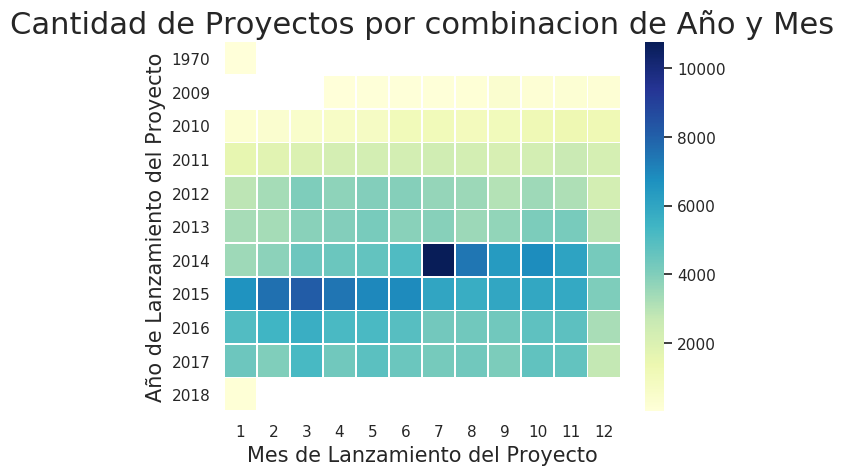

In [269]:
#Utilizamos la visualizaciòn con seaborn con el mètodo .heatmap:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22) #Tìtulo
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)  #EJe x
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15) #Eje y

#De esta manera obtenemos un heatmap de cantidad de proyectos por combinaciòn de año y mes...
#donde empezarìamos en el año 2009 en el mes 2. Y vemos que en el 2014 mes 7 tuvo la mayor cantidad de proyectos.. habrìa que analizar porque, si por una campaña o que.

Tutorial bastante extenso de Pandas (de su doc oficial) donde se toca el tema del reshaping y demas... https://pandas.pydata.org/docs/user_guide/reshaping.html